In [3]:
import pennylane as qml
from pennylane import numpy as np


In [43]:
def prep_state():
    qml.Hadamard(wires=0)


In [37]:
def encoding_map_repetition(wires):
    prep_state()
    for wire in wires[1:]:
        qml.CNOT(wires=[0, wire])
    for wire in wires:
        qml.Hadamard(wires=wire)

In [6]:
dev3_rep = qml.device("default.qubit", wires=3)
print(qml.draw(encoding_map_repetition)(dev3_rep.wires))

0: ──H─╭●─╭●─┤  
1: ────╰X─│──┤  
2: ───────╰X─┤  


In [7]:
def variational_circuit_3(alpha, wires):
    for wire in wires:
        qml.Hadamard(wires=wire)

    qml.IsingZZ(alpha, wires=[2, 0])
    qml.IsingZZ(alpha, wires=[0, 1])
    qml.IsingZZ(alpha, wires=[1, 2])

In [8]:
dev3_VGQEC = qml.device("default.qubit", wires=3)
def VGQEC_3_encoding(alpha, wires):
    encoding_map_repetition(wires)
    variational_circuit_3(alpha, wires)

In [9]:
print(qml.draw(VGQEC_3_encoding)(np.pi/2, dev3_VGQEC.wires))

0: ──H─╭●─╭●──H─╭IsingZZ(1.57)─╭IsingZZ(1.57)────────────────┤  
1: ────╰X─│───H─│──────────────╰IsingZZ(1.57)─╭IsingZZ(1.57)─┤  
2: ───────╰X──H─╰IsingZZ(1.57)────────────────╰IsingZZ(1.57)─┤  


In [10]:
dev5_rep = qml.device("default.qubit", wires=5)
print(qml.draw(encoding_map_repetition)(dev5_rep.wires))

0: ──H─╭●─╭●─╭●─╭●─┤  
1: ────╰X─│──│──│──┤  
2: ───────╰X─│──│──┤  
3: ──────────╰X─│──┤  
4: ─────────────╰X─┤  


In [19]:
def Variation_circuit_5(wires, alpha):
    qml.IsingZZ(alpha, wires=[4, 0])
    qml.IsingZZ(alpha, wires=[0, 1])
    qml.IsingZZ(alpha, wires=[1, 2])
    qml.IsingZZ(alpha, wires=[2, 3])
    qml.IsingZZ(alpha, wires=[3, 4])

In [20]:
def encoding_map_513(wires):
    encoding_map_repetition(wires)
    for wire in wires:
        qml.Hadamard(wires=wire)

    Variation_circuit_5(wires, -np.pi/2)

In [38]:
dev5_513 = qml.device("default.qubit", wires=5)
print(qml.draw(encoding_map_513)(dev5_513.wires))


0: ──X─╭●─╭●─╭●─╭●──H──H─╭IsingZZ(-1.57)─╭IsingZZ(-1.57)────────────────────────────────
1: ────╰X─│──│──│───H──H─│───────────────╰IsingZZ(-1.57)─╭IsingZZ(-1.57)────────────────
2: ───────╰X─│──│───H──H─│───────────────────────────────╰IsingZZ(-1.57)─╭IsingZZ(-1.57)
3: ──────────╰X─│───H──H─│───────────────────────────────────────────────╰IsingZZ(-1.57)
4: ─────────────╰X──H──H─╰IsingZZ(-1.57)────────────────────────────────────────────────

──────────────────┤  
──────────────────┤  
──────────────────┤  
──╭IsingZZ(-1.57)─┤  
──╰IsingZZ(-1.57)─┤  


In [39]:
dev5_VGQEC = qml.device("default.qubit", wires=5)
def VGQEC_5_encoding(wires, alpha):
    encoding_map_repetition(wires)
    for wire in wires:
        qml.Hadamard(wires=wire)
    Variation_circuit_5(dev5_VGQEC.wires, alpha)

In [26]:
print(qml.draw(VGQEC_5_encoding)(dev5_VGQEC.wires, np.pi))

0: ──H─╭●─╭●─╭●─╭●──H─╭IsingZZ(3.14)─╭IsingZZ(3.14)──────────────────────────────────────────────┤  
1: ────╰X─│──│──│───H─│──────────────╰IsingZZ(3.14)─╭IsingZZ(3.14)───────────────────────────────┤  
2: ───────╰X─│──│───H─│─────────────────────────────╰IsingZZ(3.14)─╭IsingZZ(3.14)────────────────┤  
3: ──────────╰X─│───H─│────────────────────────────────────────────╰IsingZZ(3.14)─╭IsingZZ(3.14)─┤  
4: ─────────────╰X──H─╰IsingZZ(3.14)──────────────────────────────────────────────╰IsingZZ(3.14)─┤  


(<Figure size 1200x400 with 1 Axes>, <Axes: >)


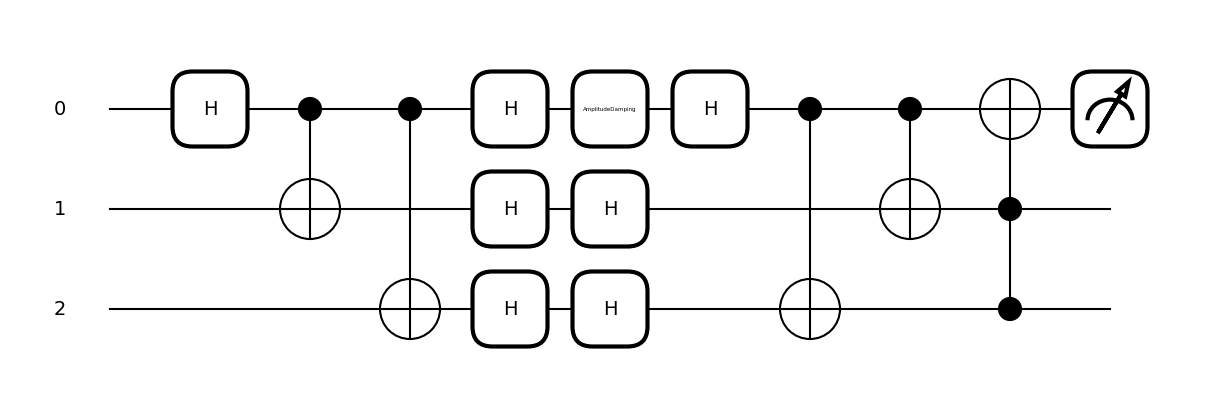

In [63]:
dev3_rep_circuit = qml.device("default.mixed", wires=3)
@qml.qnode(dev3_rep_circuit)
def circuit_3(wires, alpha):
    encoding_map_repetition(wires)
    qml.AmplitudeDamping(alpha, wires=[0])
    # for wire in wires:
    #     qml.AmplitudeDamping(alpha, wires=[wire])
    for wire in wires:
        qml.Hadamard(wires=wire)
    qml.CNOT(wires=[0, 2])
    qml.CNOT(wires=[0, 1])
    qml.Toffoli(wires=[2, 1, 0])
    return qml.density_matrix(wires=0)

print(qml.draw_mpl(circuit_3)(dev3_rep_circuit.wires, 0.9))


In [64]:
print(circuit_3(dev3_rep_circuit.wires, 0.1))

[[0.5 +0.j 0.45+0.j]
 [0.45+0.j 0.5 +0.j]]


c:\Users\linab\anaconda3\envs\cpen400\lib\site-packages\pennylane\ops\op_math\controlled_ops.py:1177: UserWarning: The control_wires keyword for MultiControlledX is deprecated, and will be removed soon. Use wires = (*control_wires, target_wire) instead.
  warnings.warn(


(<Figure size 2000x600 with 1 Axes>, <Axes: >)


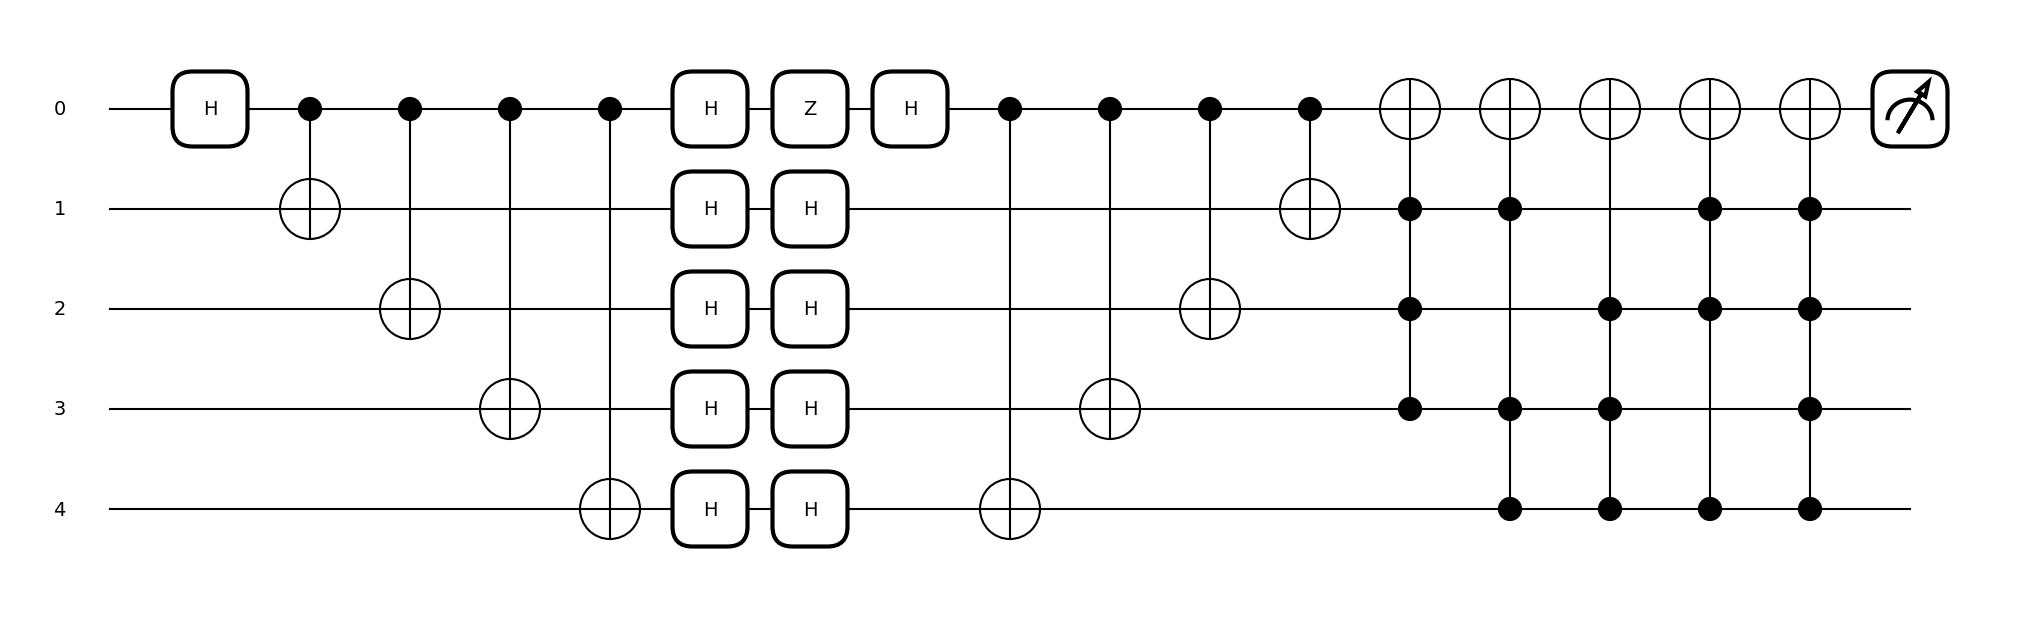

In [71]:
dev5_rep_circuit = qml.device("default.mixed", wires=5)
@qml.qnode(dev5_rep_circuit)
def circuit_5(wires, alpha):
    encoding_map_repetition(wires)
    # qml.AmplitudeDamping(alpha, wires=[0])
    qml.PauliZ(wires=0)
    # for wire in wires:
    #     qml.AmplitudeDamping(alpha, wires=[wire])
    for wire in wires:
        qml.Hadamard(wires=wire)
    qml.CNOT(wires=[0, 4])
    qml.CNOT(wires=[0, 3])
    qml.CNOT(wires=[0, 2])
    qml.CNOT(wires=[0, 1])

    qml.MultiControlledX(control_wires=[1, 2, 3], wires=0)
    qml.MultiControlledX(control_wires=[4, 3, 1], wires=0)
    qml.MultiControlledX(control_wires=[4, 3, 2], wires=0)
    qml.MultiControlledX(control_wires=[4, 2, 1], wires=0)
    qml.MultiControlledX(control_wires=[4, 3, 2, 1], wires=0)
    
    return qml.density_matrix(wires=0)

print(qml.draw_mpl(circuit_5)(dev5_rep_circuit.wires, 0.1))


In [72]:
print(circuit_5(dev5_rep_circuit.wires, 0.1))

[[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]


c:\Users\linab\anaconda3\envs\cpen400\lib\site-packages\pennylane\ops\op_math\controlled_ops.py:1177: UserWarning: The control_wires keyword for MultiControlledX is deprecated, and will be removed soon. Use wires = (*control_wires, target_wire) instead.
  warnings.warn(


In [20]:
# dev_var = qml.device("default.qubit", wires=5)
# def encoding_variational(params):
#     for wire in dev_var.wires:
#         qml.RZ(params[0], wires=wire)

#     qml.IsingZZ(params[1], wires=[0, 1])
#     qml.IsingZZ(params[1], wires=[3, 4])

#     qml.RX(params[2], wires=1)
#     qml.RX(params[2], wires=3)

#     qml.IsingZZ(params[1], wires=[1, 2])
#     qml.IsingZZ(params[1], wires=[2, 3])

#     qml.RX(params[2], wires=2)

#     qml.IsingZZ(params[1], wires=[1, 2])
#     qml.IsingZZ(params[1], wires=[2, 3])

#     qml.RX(params[2], wires=1)
#     qml.RX(params[2], wires=3)

#     qml.IsingZZ(params[1], wires=[0, 1])
#     qml.IsingZZ(params[1], wires=[1, 2])
#     qml.IsingZZ(params[1], wires=[2, 3])
#     qml.IsingZZ(params[1], wires=[3, 4])

#     qml.RX(params[2], wires=0)
#     qml.RX(params[2], wires=2)
#     qml.RX(params[2], wires=4)

#     qml.IsingZZ(params[1], wires=[1, 2])
#     qml.IsingZZ(params[1], wires=[2, 3])

#     qml.RX(params[2], wires=1)
#     qml.RX(params[2], wires=2)
#     qml.RX(params[2], wires=3)

#     qml.IsingZZ(params[1], wires=[1, 2])
#     qml.IsingZZ(params[1], wires=[2, 3])

#     qml.RX(params[2], wires=2)

#     qml.IsingZZ(params[1], wires=[1, 2])
#     qml.IsingZZ(params[1], wires=[2, 3])

#     qml.RX(params[2], wires=1)
#     qml.RX(params[2], wires=3)

#     qml.IsingZZ(params[1], wires=[0, 1])
#     qml.IsingZZ(params[1], wires=[3, 4])

#     qml.RX(params[2], wires=1)
#     qml.RX(params[2], wires=3)

#     qml.IsingZZ(params[1], wires=[1, 2])
#     qml.IsingZZ(params[1], wires=[2, 3])  

#     qml.RX(params[2], wires=2)

#     qml.IsingZZ(params[1], wires=[1, 2])
#     qml.IsingZZ(params[1], wires=[2, 3])  

#     qml.RX(params[2], wires=1)
#     qml.RX(params[2], wires=3)

#     qml.IsingZZ(params[1], wires=[0, 1])
#     qml.IsingZZ(params[1], wires=[3, 4])
    
#     qml.RX(params[2], wires=0)
#     qml.RX(params[2], wires=4)

#     for wire in dev_var.wires:
#         qml.RZ(params[0], wires=wire)



In [27]:
# print(qml.draw(encoding_variational)(np.array([0.1, 0.2, 0.3])))